<a href="https://colab.research.google.com/github/Nayal17/Opencv-Starter/blob/main/OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!git clone https://github.com/lordloh/playing-cards.git

Cloning into 'playing-cards'...
remote: Enumerating objects: 236, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 236 (delta 0), reused 1 (delta 0), pack-reused 235
Receiving objects: 100% (236/236), 522.52 MiB | 28.84 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Checking out files: 100% (217/217), done.


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import shutil

In [4]:
img = cv2.imread(r'/content/playing-cards/img/cards-[D2]-001.jpg',1) # 0 for grayscale, 1-->color(default),
# -1--> load image as such including alpha channel

Below color in blue instead of red, because opencv reads the image in bgr format and the image is in rgb format

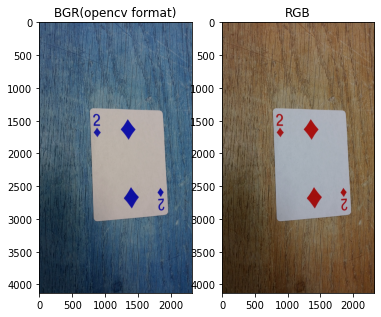

In [5]:
plt.figure(figsize=(6,6))
plt.subplot(121);plt.imshow(img) ; plt.title("BGR(opencv format)") # cmap = 'gray' for grayscale
plt.subplot(122);plt.imshow(img[:,:,::-1]) ; plt.title("RGB") 
plt.show()

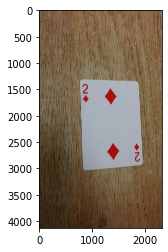

In [6]:
# we can also change color channel format as follows
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

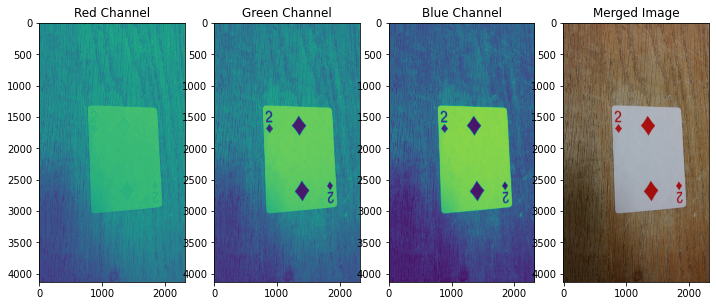

In [7]:
plt.figure(figsize=(12,8))
b,g,r = cv2.split(img)
plt.subplot(141);plt.imshow(r);plt.title("Red Channel")
plt.subplot(142);plt.imshow(g);plt.title("Green Channel")
plt.subplot(143);plt.imshow(b);plt.title("Blue Channel")
plt.subplot(144);plt.imshow(cv2.merge((b,g,r))[:,:,::-1]);plt.title("Merged Image")
plt.show()

# HSV format

HSV is a cylindrical color model that remaps the RGB primary colors into dimensions that are easier for humans to understand. Like the Munsell Color System, these dimensions are hue, saturation, and value.

>**Hue**(color) specifies the angle of the color on the RGB color circle. A 0° hue results in red, 120° results in green, and 240° results in blue.

>**Saturation**(purity) controls the amount of color used. A color with 100% saturation will be the purest color possible, while 0% saturation yields grayscale.

>**Value**(brightness) controls the brightness of the color. A color with 0% brightness is pure black while a color with 100% brightness has no black mixed into the color. Because this dimension is often referred to as brightness, the HSV color model is sometimes called HSB.

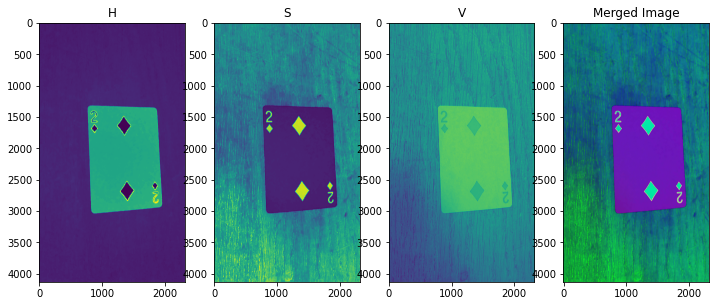

In [8]:
hsv_image = cv2.cvtColor(img ,cv2.COLOR_BGR2HSV)
plt.figure(figsize=(12,8))
h, s, v = cv2.split(hsv_image)
plt.subplot(141);plt.imshow(h);plt.title("H")
plt.subplot(142);plt.imshow(s);plt.title("S")
plt.subplot(143);plt.imshow(v);plt.title("V")
plt.subplot(144);plt.imshow(cv2.merge((h,s,v)));plt.title("Merged Image")
plt.show()

In [9]:
cv2.imwrite('temp.jpg',hsv_image) # Saving Image

True

In [10]:
# will not work for jupyter

# window = cv2.namedWindow("w1")
# cv2.imshow(window,hsv_image)
# cv2.waitkey(8000) # wait for 8000 ms or 8 sec, if 0 the need keyboard interuption 
# cv2.destroyWindow(window)

# window = cv2.namedWindow("w2")
# while True:
#   cv2.imshow(window,hsv_image)
#   keypress = cv2.waitkey(1) 
#   if keypress == ord('e'):
#     break
# cv2.destroyWindow(window)


# Cropping Image

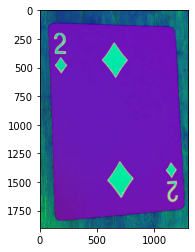

In [11]:
cropped_image = hsv_image[1200:3100,700:2000]
plt.imshow(cropped_image)
plt.show()

#Resizing

**Interpolation tips:**

If you are enlarging the image, you should prefer to use INTER_LINEAR or INTER_CUBIC interpolation. If you are shrinking the image, you should prefer to use INTER_AREA interpolation.

Cubic interpolation is computationally more complex, and hence slower than linear interpolation. However, the quality of the resulting image will be higher.

INTER_NEAREST – a nearest-neighbor interpolation

INTER_LINEAR – a bilinear interpolation (used by default)

INTER_AREA – resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire’-free results. But when the image is zoomed, it is similar to the INTER_NEAREST method.

INTER_CUBIC – a bicubic interpolation over 4×4 pixel neighborhood

INTER_LANCZOS4 – a Lanczos interpolation over 8×8 pixel neighborhood

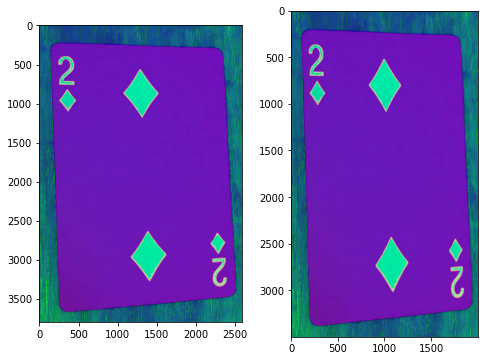

In [12]:
plt.figure(figsize=(8,6))
factor_scale = cv2.resize(cropped_image,dsize=None,fx=2,fy=2,interpolation=cv2.INTER_CUBIC) # doubles the image size
plt.subplot(121);plt.imshow(factor_scale)

size_scale = cv2.resize(cropped_image,dsize=(2000,3500),interpolation=cv2.INTER_CUBIC) # (w,h)
plt.subplot(122);plt.imshow(size_scale)
plt.show()

#Flipping

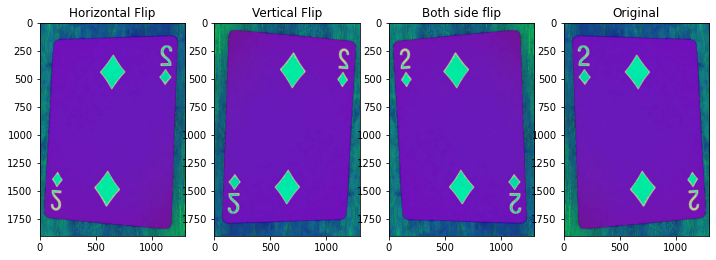

In [13]:
plt.figure(figsize=(12,8))
hf = cv2.flip(cropped_image,1)
vf = cv2.flip(cropped_image,0)
hvf = cv2.flip(cropped_image,-1)

plt.subplot(141);plt.imshow(hf);plt.title("Horizontal Flip")
plt.subplot(142);plt.imshow(vf);plt.title("Vertical Flip")
plt.subplot(143);plt.imshow(hvf);plt.title("Both side flip")
plt.subplot(144);plt.imshow(cropped_image);plt.title("Original")
plt.show()

#Annotation

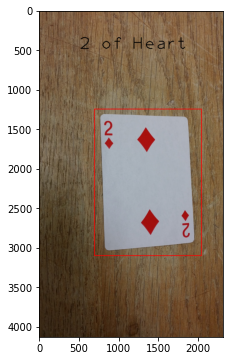

In [14]:
rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
ann_img = rgb_img.copy()

plt.figure(figsize=(16,6))
cv2.line(ann_img,(700,1250),(2050,1250),color=(255,0,0),thickness=8, lineType=cv2.LINE_AA)
cv2.line(ann_img,(2050,3100),(2050,1250),color=(255,0,0),thickness=8, lineType=cv2.LINE_AA)
cv2.line(ann_img,(700,3100),(700,1250),color=(255,0,0),thickness=8, lineType=cv2.LINE_AA)
cv2.line(ann_img,(700,3100),(2050,3100),color=(255,0,0),thickness=8, lineType=cv2.LINE_AA)

text = "2 of Heart"
fontScale = 15.2
fontFace = cv2.FONT_HERSHEY_PLAIN
fontColor = (0,0,0)
fontThickness = 10
cv2.putText(ann_img,text,(500,500),fontFace,fontScale,fontColor,fontThickness)

plt.imshow(ann_img)
plt.show()

# Image Enhancement using mathematical operations

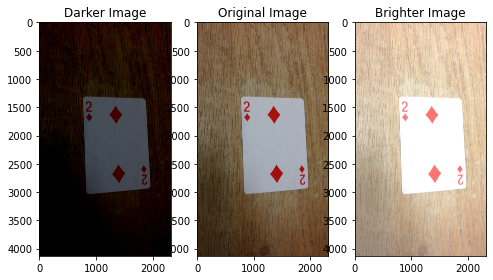

In [15]:
matrix = np.ones(rgb_img.shape, dtype='uint8') * 100

dark_img = cv2.subtract(rgb_img, matrix) # adding using + operator will give wrong results as it does not saturates at 0 and 255. e.g., 255+2 = 2.
brighter_img = cv2.add(rgb_img, matrix)

plt.figure(figsize=(8,10))
plt.subplot(131);plt.imshow(dark_img);plt.title("Darker Image")
plt.subplot(132);plt.imshow(rgb_img);plt.title("Original Image")
plt.subplot(133);plt.imshow(brighter_img);plt.title("Brighter Image")
plt.show()

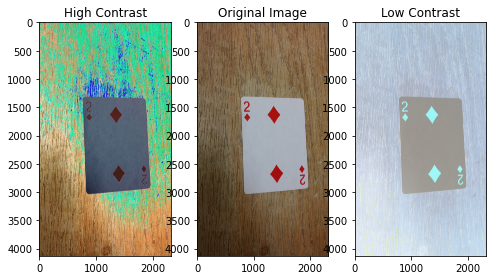

In [16]:
matrix1 = np.ones(rgb_img.shape) * 2
matrix2 = np.ones(rgb_img.shape) * -0.6 # (any number less than 1 but non negative will show similar results like low brightness)

# NOTE: cv2.multiply don't clip values to (0,255) as it was in cv2.add. We are able to see difference between contrast and brightness when value axceeds 255
# In brightness(adding) values clips at (0,255) while it's not the case in contrast 
high_contrast_img = np.uint8(cv2.multiply(np.float64(rgb_img), matrix1)) 
low_contrast_img = np.uint8(cv2.multiply(np.float64(rgb_img), matrix2)) # to clip values we can use cv2.clip( img , lower limit, upper_limit)

plt.figure(figsize=(8,10))
plt.subplot(131);plt.imshow(high_contrast_img);plt.title("High Contrast")
plt.subplot(132);plt.imshow(rgb_img);plt.title("Original Image")
plt.subplot(133);plt.imshow(low_contrast_img);plt.title("Low Contrast")
plt.show()

#Global Thresholding

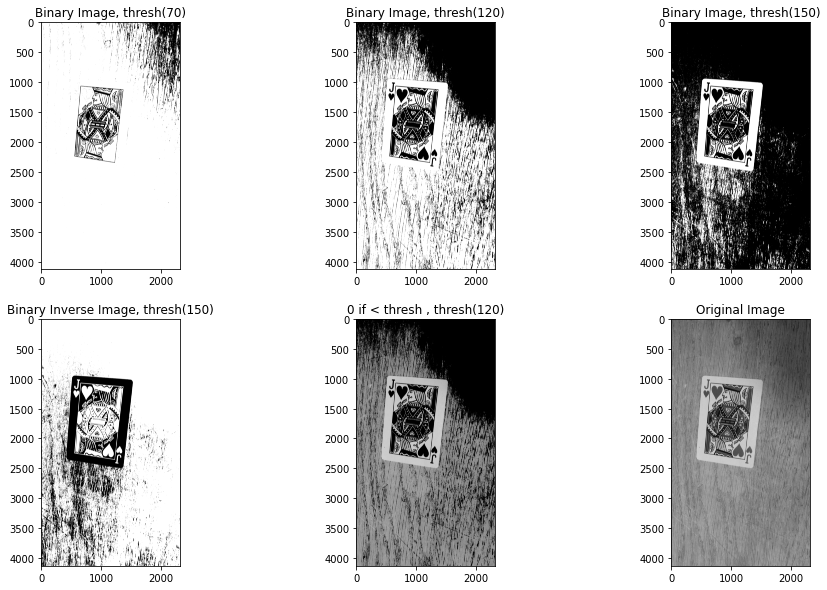

In [17]:
gray_img = cv2.imread(r'/content/playing-cards/img/cards-[HJ]-001.jpg',0)  # img should be a gray scale image
retval_1 ,thresh_img_1 = cv2.threshold(gray_img, 70, 255, cv2.THRESH_BINARY) # cv2.threshold(img, thresh, maxval, type)
retval_2 ,thresh_img_2 = cv2.threshold(gray_img, 120, 255, cv2.THRESH_BINARY) 
retval_3 ,thresh_img_3 = cv2.threshold(gray_img, 150, 255, cv2.THRESH_BINARY) 
retval_4 ,thresh_binary_inv = cv2.threshold(gray_img, 150, 255, cv2.THRESH_BINARY_INV) 
retval_5 ,thresh_tozero = cv2.threshold(gray_img, 120, 255, cv2.THRESH_TOZERO)  # 0 if less than thresh.


plt.figure(figsize=(16,10))
plt.subplot(231); plt.imshow(thresh_img_1, cmap="gray"); plt.title("Binary Image, thresh(70)")
plt.subplot(232); plt.imshow(thresh_img_2, cmap="gray"); plt.title("Binary Image, thresh(120)")
plt.subplot(233); plt.imshow(thresh_img_3, cmap="gray"); plt.title("Binary Image, thresh(150)")
plt.subplot(234); plt.imshow(thresh_binary_inv, cmap="gray"); plt.title("Binary Inverse Image, thresh(150)")
plt.subplot(235); plt.imshow(thresh_tozero, cmap="gray"); plt.title("0 if < thresh , thresh(120)")
plt.subplot(236); plt.imshow(gray_img, cmap="gray"); plt.title("Original Image")
plt.show()

#Adaptive Thresholding

In the previous section, we used one global value as a threshold. But this might not be good in all cases, e.g. if an image has different lighting conditions in different areas. In that case, adaptive thresholding can help. Here, the algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination.

>**cv.ADAPTIVE_THRESH_MEAN_C**: The threshold value is the mean of the neighbourhood area minus the constant C.
>**cv.ADAPTIVE_THRESH_GAUSSIAN_C**: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C

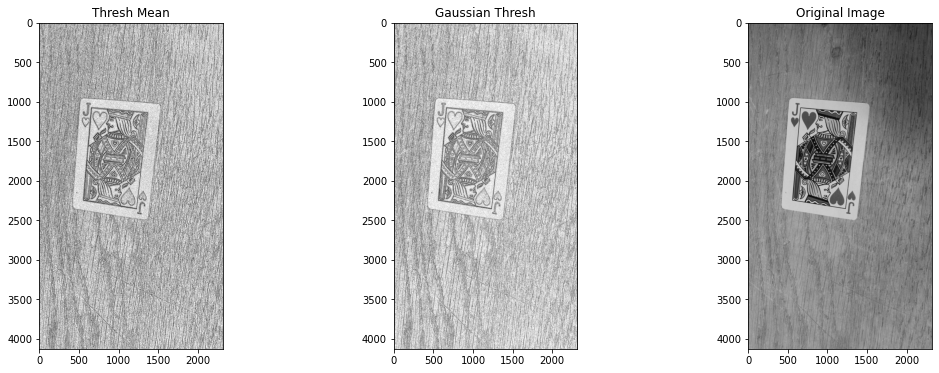

In [18]:
thresh_mean = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,7,2) # cv2.threshold(img, maxval, adaptiveMethod, treshtype, )
thresh_gauss = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,7,2)  


plt.figure(figsize=(18,6))
plt.subplot(131); plt.imshow(thresh_mean, cmap="gray"); plt.title("Thresh Mean")
plt.subplot(132); plt.imshow(thresh_gauss, cmap="gray"); plt.title("Gaussian Thresh")
plt.subplot(133); plt.imshow(gray_img, cmap="gray"); plt.title("Original Image")
plt.show()

#Bitwise Operations

In [19]:
rec1 = np.uint8(np.zeros((500,500)))
rec2 = np.uint8(np.zeros((500,500)))

rec1[:350,:350] = 255
rec2[150:500,150:500] = 255

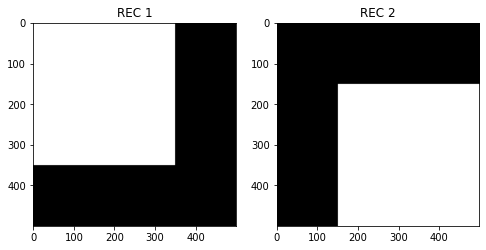

In [20]:
plt.figure(figsize=(8,6))
plt.subplot(121); plt.imshow(rec1,cmap="gray"); plt.title("REC 1")
plt.subplot(122); plt.imshow(rec2,cmap="gray"); plt.title("REC 2")
plt.show()

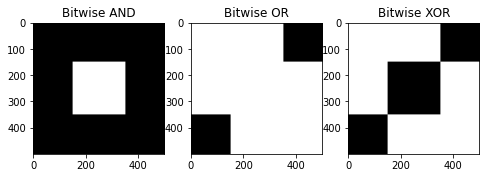

In [21]:
ba = cv2.bitwise_and(rec1, rec2, mask=None)
bo = cv2.bitwise_or(rec1, rec2, mask=None)
bxor = cv2.bitwise_xor(rec1, rec2, mask=None)

plt.figure(figsize=(8,6))
plt.subplot(131); plt.imshow(ba,cmap="gray"); plt.title("Bitwise AND")
plt.subplot(132); plt.imshow(bo,cmap="gray"); plt.title("Bitwise OR")
plt.subplot(133); plt.imshow(bxor,cmap="gray"); plt.title("Bitwise XOR")

plt.show()

#Applications of Bitwise operations

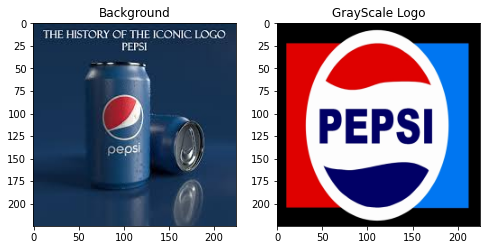

In [24]:
pepsi_can = cv2.imread("/content/pepsi_2.jpg")
logo = cv2.imread("/content/pepsi.jpg")

pepsi_can = pepsi_can[:,:,::-1]
logo = cv2.resize(logo[:,:,::-1],(pepsi_can.shape[1],pepsi_can.shape[0]),interpolation=cv2.INTER_AREA)

plt.figure(figsize=(8,6))
plt.subplot(121); plt.imshow(pepsi_can); plt.title("Background")
plt.subplot(122); plt.imshow(logo); plt.title("GrayScale Logo")
plt.show()

logo_gs = cv2.cvtColor(logo, cv2.COLOR_RGB2GRAY)

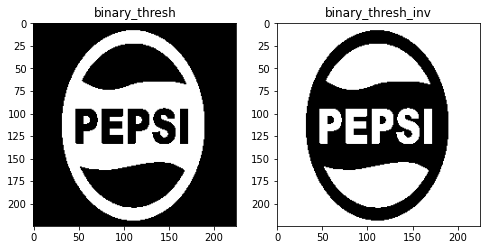

In [25]:
ret, img_mask = cv2.threshold(logo_gs,150,255,cv2.THRESH_BINARY)
ret, img_mask_inv = cv2.threshold(logo_gs,150,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize=(8,6))
plt.subplot(121); plt.imshow(img_mask,cmap="gray"); plt.title("binary_thresh")
plt.subplot(122); plt.imshow(img_mask_inv,cmap="gray"); plt.title("binary_thresh_inv")
plt.show()

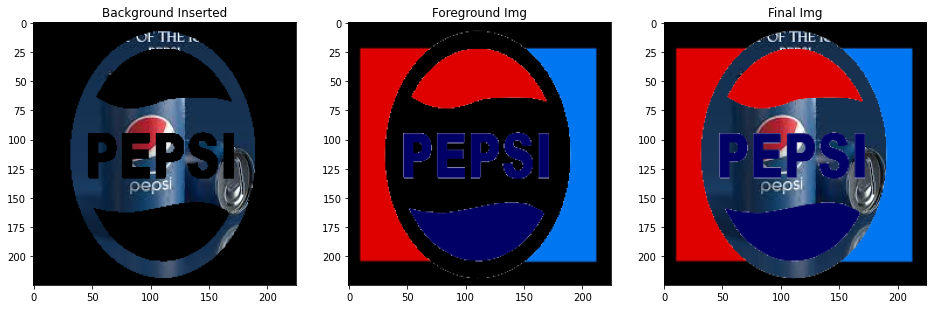

In [32]:
bg_inserted_img = cv2.bitwise_and(pepsi_can,pepsi_can,mask=img_mask) # if mask != 0
foreground_img = cv2.bitwise_and(logo,logo,mask=img_mask_inv)
final_img = cv2.add(bg_inserted_img,foreground_img)

plt.figure(figsize=(16,10))
plt.subplot(131); plt.imshow(bg_inserted_img); plt.title("Background Inserted");
plt.subplot(132); plt.imshow(foreground_img); plt.title("Foreground Img");
plt.subplot(133); plt.imshow(final_img); plt.title("Final Img")
plt.show()